# 1.モジュールインポート

In [1]:
# scikitlearnのアルゴリズムのロード
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier 
from xgboost import XGBClassifier

# scikit learnの精度測定ツールの読み込み
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# pandas(pd) とNumpy(np)のモジュール
import numpy as np
import pandas as pd
import sys,os,random
import warnings
import pickle

warnings.filterwarnings('ignore')
%matplotlib inline

# 変数定義

In [2]:
pram_traing_rate=0.8  #トレーニングデータとテストデータの比率

# 前処理済みファイルのロード

In [3]:
# 乱数のシード固定
np.random.seed(0)
random.seed(0)
# データフレームの表示件数の設定
pd.set_option('display.max_columns', 100)

# データロード
df = pd.read_pickle('data/stock_preprocessing_20201017.pkl')

y_loc=df.columns.get_loc('result')
df=df.dropna(how="any",axis=0)

display(df.head(3))
display(df.tail(10))

# 前後のデータのカット
#df=df.loc[NaN_no:(len(df)-NaN_no),:]
df_num=df.as_matrix()   #numpyへ変換

df_len=len(df)

,Date,Open,Close,dow_compare,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day+31,day+32,day+33,day+34,day+35,day+36,day+37,day+38,day+39,day+40,day+41,day+42,day+43,day+44,day+45,day+46,day+47,day+48,day+49,day+50,day+51,day+52,day+53,day+54,day+55,day+56,day+57,day+58,day+59,day+60,day+61,day+62,day+63,day+64,day+65,day+66,day+67,day+68,day+69,day+70,day+71,day+72,day+73,day+74,day+75,day+76,day+77,day+78,day+79,day+80,day+81,day+82,day+83,day+84,day+85,day+86,day+87,day+88,day+89,day+90,result
90,2000-05-22,16802.660156,16386.009766,0.987238,-0.929400,-3.238853,-4.469605,-3.114713,-3.413277,-0.950308,-4.560980,-5.598848,-7.435443,-9.006156,-9.162631,-6.544154,-6.835831,-7.283899,-8.316956,-8.846167,-11.800206,-11.757822,-11.555918,-11.977264,-17.397143,-17.861432,-18.970217,-17.939577,-18.212944,-17.507897,-17.104094,-17.940657,-18.221699,-19.014817,-17.341428,-17.517048,-18.853011,-17.660499,-17.120817,-15.886354,-14.932544,-14.921128,-14.325603,-14.265709,-13.099875,-12.007829,-12.120257,-12.209836,-14.843473,-14.857884,-14.930651,-15.378990,-15.148961,-16.160584,-16.083367,-16.394651,-16.112866,-14.972833,-15.067043,-14.374285,-14.343201,-13.562872,-14.863538,-15.361132,-14.474476,-13.471134,-14.218837,-14.701118,-15.630361,-15.693355,-15.798512,-15.278255,-15.420820,-14.483097,-13.931072,-13.994290,-13.277082,-12.763348,-12.145798,-11.485003,-11.585378,-10.995604,-11.541159,-11.239146,-12.403426,-11.684030,-11.016953,-9.988223,-10.529776,-7.910948,-7.647503,-9.536711,-11.581280,-11.272844,1
91,2000-05-23,16345.259766,16318.730469,0.992260,-2.722190,-3.626290,-5.872875,-7.070124,-5.752115,-6.042552,-3.646629,-7.159012,-8.168627,-9.955226,-11.483182,-11.635397,-9.088200,-9.371937,-9.807807,-10.812743,-11.327548,-14.201173,-14.159942,-13.963535,-14.373410,-19.645750,-20.097400,-21.176002,-20.173418,-20.439344,-19.753489,-19.360678,-20.174469,-20.447860,-21.219388,-19.591552,-19.762391,-21.061986,-19.901937,-19.376946,-18.176088,-17.248242,-17.237137,-16.657823,-16.599559,-15.465462,-14.403143,-14.512510,-14.599651,-17.161596,-17.175615,-17.246401,-17.682535,-17.458768,-18.442853,-18.367738,-18.670548,-18.396433,-17.287435,-17.379080,-16.705180,-16.674942,-15.915855,-17.181115,-17.665163,-16.802644,-15.826615,-16.553963,-17.023116,-17.927063,-17.988342,-18.090637,-17.584542,-17.723226,-16.811029,-16.274032,-16.335529,-15.637845,-15.138095,-14.537356,-13.894549,-13.992192,-13.418473,-13.949177,-13.655386,-14.787972,-14.088158,-13.439240,-12.438515,-12.965325,-10.417787,-10.161514,-11.999294,-13.988206,1
92,2000-05-24,16237.879883,16044.440430,0.988913,-0.656948,-3.361255,-4.259415,-6.491242,-7.680625,-6.371275,-6.659804,-4.279621,-7.768929,-8.771912,-10.546773,-12.064691,-12.215906,-9.685444,-9.967316,-10.400323,-11.398657,-11.910080,-14.764827,-14.723867,-14.528750,-14.935932,-20.173636,-20.622319,-21.693835,-20.697837,-20.962016,-20.280667,-19.890437,-20.698881,-20.970476,-21.736936,-20.119793,-20.289510,-21.580568,-20.428140,-19.906597,-18.713628,-17.791878,-17.780846,-17.205338,-17.147457,-16.020810,-14.965470,-15.074119,-15.160687,-17.705801,-17.719728,-17.790049,-18.223318,-18.001021,-18.978641,-18.904019,-19.204840,-18.932526,-17.830813,-17.921856,-17.252384,-17.222345,-16.468245,-17.725192,-18.206060,-17.349207,-16.379590,-17.102160,-17.568231,-18.466240,-18.527116,-18.628739,-18.125969,-18.263742,-17.357538,-16.824069,-16.885161,-16.192061,-15.695594,-15.098801,-14.460218,-14.557219,-13.987269,-14.514486,-14.222625,-15.347771,-14.652555,-14.007900,-13.013748,-13.537098,-11.006296,-10.751706,-12.577413,1


,Date,Open,Close,dow_compare,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day+31,day+32,day+33,day+34,day+35,day+36,day+37,day+38,day+39,day+40,day+41,day+42,day+43,day+44,day+45,day+46,day+47,day+48,day+49,day+50,day+51,day+52,day+53,day+54,day+55,day+56,day+57,day+58,day+59,day+60,day+61,day+62,day+63,day+64,day+65,day+66,day+67,day+68,day+69,day+70,day+71,day+72,day+73,day+74,day+75,day+76,day+77,day+78,day+79,day+80,day+81,day+82,day+83,day+84,day+85,day+86,day+87,day+88,day+89,day+90,result
4922,2020-10-19,23543.689453,23671.130859,1.001246,0.278081,-0.020213,-0.008370,-0.524808,-0.190984,-0.717597,0.158892,1.165499,0.527834,1.244546,1.068430,1.547383,0.276163,0.568930,0.648635,1.405671,1.415849,1.281082,0.954068,0.542650,0.505690,0.447375,0.480255,1.856221,1.509989,2.511436,1.720504,1.787131,0.081614,1.214903,1.966504,1.713166,1.340326,0.998027,1.232481,1.294810,2.751646,2.262673,2.347936,2.373082,1.930438,1.527455,0.942250,1.817773,3.500394,4.613002,4.947495,4.770347,4.733016,5.200906,7.272371,5.730749,4.688683,4.434899,3.556935,4.657462,3.299174,3.309913,3.388445,3.227521,2.775142,3.180744,4.028922,4.213380,4.476237,4.907646,4.724217,3.946106,5.733976,6.135461,5.396063,5.411168,5.790320,4.991535,5.634546,4.448247,4.009659,5.323506,4.565424,5.275509,4.558966,7.445139,6.362786,6.618796,3.044771,2.636076,1.763071,1.823845,4.115359,2.877626,1
4923,2020-10-20,23587.869141,23567.039062,0.984699,0.187650,0.466253,0.167399,0.179264,-0.338143,-0.003693,-0.531294,0.346840,1.355336,0.716474,1.434531,1.258085,1.737937,0.464331,0.757648,0.837502,1.595959,1.606156,1.471135,1.143508,0.731318,0.694288,0.635864,0.668806,2.047354,1.700472,2.703799,1.911382,1.978134,0.269417,1.404832,2.157844,1.904030,1.530491,1.187549,1.422443,1.484889,2.944460,2.454568,2.539992,2.565185,2.121710,1.717972,1.131667,2.008833,3.694612,4.809308,5.144429,4.966948,4.929547,5.398315,7.473667,5.929152,4.885131,4.630871,3.751260,4.853851,3.493015,3.503773,3.582453,3.421227,2.968000,3.374362,4.224132,4.408937,4.672287,5.104505,4.920732,4.141161,5.932386,6.334624,5.593838,5.608972,5.988835,5.188552,5.832769,4.644243,4.204833,5.521145,4.761641,5.473058,4.755171,7.646760,6.562376,6.818865,3.238135,2.828672,1.954029,2.014917,4.310731,1
4924,2020-10-21,23615.519531,23639.460938,1.002228,0.117223,0.305093,0.584022,0.284818,0.296697,-0.221316,0.113526,-0.414694,0.464469,1.474148,0.834537,1.553436,1.376783,1.857197,0.582098,0.875759,0.955707,1.715053,1.725262,1.590083,1.262071,0.849398,0.812325,0.753832,0.786813,2.166977,1.819688,2.824191,2.030846,2.097676,0.386955,1.523702,2.277597,2.023485,1.649508,1.306164,1.541334,1.603853,3.065134,2.574669,2.660192,2.685415,2.241420,1.837208,1.250217,2.128411,3.816166,4.932169,5.267682,5.089993,5.052549,5.521866,7.599651,6.053325,5.008081,4.753522,3.872880,4.976764,3.614332,3.625104,3.703876,3.542461,3.088702,3.495541,4.346306,4.531328,4.794987,5.227712,5.043723,4.263238,6.056563,6.459273,5.717618,5.732770,6.113079,5.311857,5.956830,4.766911,4.326985,5.644840,4.884445,5.596697,4.877968,7.772946,6.687292,6.944082,3.359153,2.949211,2.073543,2.134502,1
4925,2020-10-22,23525.589844,23474.269531,0.997883,-0.380808,-0.264031,-0.076877,0.200991,-0.097074,-0.085240,-0.601281,-0.267714,-0.793922,0.081893,1.087727,0.450552,1.166712,0.990732,1.469317,0.199074,0.491616,0.571260,1.327714,1.337884,1.203220,0.876458,0.465356,0.428424,0.370154,0.403009,1.777917,1.431951,2.432629,1.642305,1.708880,0.004674,1.137092,1.888116,1.634972,1.262419,0.920383,1.154657,1.216937,2.672654,2.184056,2.269254,2.294381,1.852077,1.449405,0.864648,1.739498,3.420826,4.532579,4.866815,4.689803,4.652501,5.120031,7.189903,5.649466,4.608202,4.354613,3.477324,4.577005,3.219761,3.230491,3.308964,3.148163,2.696132,3.101422,3.948948,4.133265,4.395919,4.826996,4.643709,3.866196,5.652691,6.053868,5.315037,5.330132,5.708992,4

## データの分割


In [4]:
loc_result=df.columns.get_loc('result')
loc_Date  =df.columns.get_loc('Date')
loc_open  =df.columns.get_loc('Open')
loc_close =df.columns.get_loc('Close')

In [5]:
#トレーニングデータと正解ラベルに分割
train, test = train_test_split(df, train_size=pram_traing_rate,shuffle=False)

# 説明変数
trainX,testX=train.iloc[:,loc_open:loc_result],test.iloc[:,loc_open:loc_result]

# 正解データ
trainY,testY=train.iloc[:,loc_result],test.iloc[:,loc_result]

#Numpy形式に変換
trainX,testX=trainX.as_matrix(),testX.as_matrix()
trainY,testY=trainY.as_matrix(),testY.as_matrix()

#データサンプル数の確認
print("訓練  データ{} : {} 〜 {}".format(train.shape,train.head(1)['Date'].values[0],train.tail(1)['Date'].values[0]))
print("テストデータ{}  : {} 〜 {}".format(test.shape, test.head(1)['Date'].values[0],test.tail(1)['Date'].values[0]))

訓練  データ(3873, 95) : 2000-05-22T00:00:00.000000000 〜 2016-09-27T00:00:00.000000000
テストデータ(969, 95)  : 2016-09-28T00:00:00.000000000 〜 2020-10-30T00:00:00.000000000


# sckit-learnの準備


In [6]:
# Initializing Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest"      : RandomForestClassifier(random_state=1, n_estimators=100),
    "Decision Tree"      : DecisionTreeClassifier(),
    "Neural Net"         : MLPClassifier(),
    "Naive Bayes"        : GaussianNB(),
    "AdaBoostClassifier" : AdaBoostClassifier(),
     "XGBClassifier"     :XGBClassifier(),
    #"SVM"                : SVC(kernel="linear"),

}

In [7]:
#columns=['name','accuracy']
df_acc=pd.DataFrame()#data=None,columns=columns)

for i in classifiers:
    
    #　該当分類器にて、学習
    classifier=classifiers[i]
    classifier.fit(trainX ,trainY)
 
    #　分類器の正答率を求める
    pre=classifier.predict(testX)
    ac_score=accuracy_score(testY,pre)
    print('分類器:{:} , 精度:{:.2%}'.format(i,ac_score))

    # 結果をデータフレームに入れる
    #s=pd.Series(data=[name,ac_score],index=columns)
    df_acc=df_acc.append({
        "name":i,
        "accuracy":ac_score
        },ignore_index=True)

分類器:Logistic Regression , 精度:62.64%
分類器:Random Forest , 精度:52.43%
分類器:Decision Tree , 精度:49.74%
分類器:Neural Net , 精度:56.76%
分類器:Naive Bayes , 精度:47.16%
分類器:AdaBoostClassifier , 精度:47.37%
分類器:XGBClassifier , 精度:52.94%


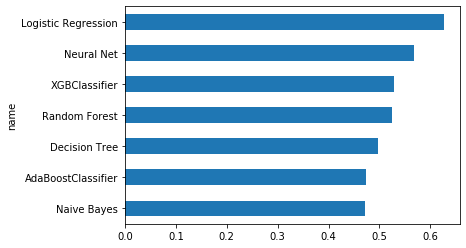

In [8]:
# データフレームの順番を分類器の精度順に表示
df_acc=df_acc.sort_values(by=['accuracy'],ascending=True)
# データフレームのラッパAPIからmatplotのapiをコールして、グラフを作成
df_acc.plot.barh(x='name',y='accuracy',legend=False)

# モデルの保存

In [9]:
df_acc[df_acc['accuracy']==df_acc['accuracy'].max()]['name'].values[0]

'Logistic Regression'

In [10]:
classifier=classifiers[
#df_acc[df_acc['accuracy']==df_acc['accuracy'].max()].index[0]
df_acc[df_acc['accuracy']==df_acc['accuracy'].max()]['name'].values[0]
]
classifier.fit(trainX ,trainY)

# モデルを保存する
filename = 'model/sk-learn_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

# ラベルデータ
#f = open('./model/predict_columns.txt', 'w')
#for x in predict_columns:
#    f.write(str(x) + "\n")
#f.close()

# テストデータ
test.to_pickle("data/df_test.pkl")

# confusion_matrix

In [11]:
from sklearn import metrics
print("0.label_down",test[test['result']==0].shape[0])
print("1.label_up  ",test[test['result']==1].shape[0])

predict_y=classifier.predict(testX)
print("confusion matrix:")
print(metrics.confusion_matrix( testY,predict_y))
print()
print("classification report:")
target_names = ['up','down']

print(metrics.classification_report(testY,predict_y))

0.label_down 535
1.label_up   434
confusion matrix:
[[393 142]
 [220 214]]

classification report:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68       535
           1       0.60      0.49      0.54       434

    accuracy                           0.63       969
   macro avg       0.62      0.61      0.61       969
weighted avg       0.62      0.63      0.62       969

